<a href="https://colab.research.google.com/github/Gowri-Rk/DeepLearningAssignments/blob/master/Graded%20Assignment%202/DL_GradedAssignment2_SparseCategoricalEntropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras model with CNN and sparse categorical entropy using Fashion dataset

Imports

In [0]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as KerasBackend

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

In [0]:
img_rows, img_cols = 28, 28

Load the data and split into training and testing

In [40]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [41]:
x_train.shape

(60000, 28, 28)

In [42]:
x_test.shape

(10000, 28, 28)

Reshape the data

In [0]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [44]:
x_train.shape[0]

60000

In [45]:
input_shape

(28, 28, 1)

Normalize the data

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [0]:
x_train /= 255
x_test /= 255

In [48]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
train_image_1 = x_train[0]

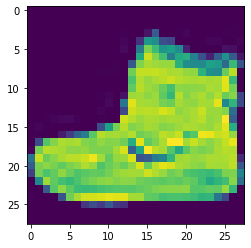

In [50]:
plt.imshow(train_image_1.reshape((28,28)))

Building the keras model

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
            optimizer=keras.optimizers.Adadelta(),
            loss='sparse_categorical_crossentropy',
            metrics=['sparse_categorical_accuracy'])

In [52]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [53]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 143s 2ms/step - loss: 0.5674 - sparse_categorical_accuracy: 0.8001 - val_loss: 0.3739 - val_sparse_categorical_accuracy: 0.8674
Epoch 2/12
60000/60000 [==============================] - 142s 2ms/step - loss: 0.3599 - sparse_categorical_accuracy: 0.8716 - val_loss: 0.3162 - val_sparse_categorical_accuracy: 0.8819
Epoch 3/12
60000/60000 [==============================] - 148s 2ms/step - loss: 0.3071 - sparse_categorical_accuracy: 0.8914 - val_loss: 0.2823 - val_sparse_categorical_accuracy: 0.9006
Epoch 4/12
60000/60000 [==============================] - 143s 2ms/step - loss: 0.2756 - sparse_categorical_accuracy: 0.8998 - val_loss: 0.2557 - val_sparse_categorical_accuracy: 0.9066
Epoch 5/12
60000/60000 [==============================] - 143s 2ms/step - loss: 0.2494 - sparse_categorical_accuracy: 0.9110 - val_loss: 0.2444 - val_sparse_categorical_accuracy: 0.9104
Epoch 6/12
60000/600

In [0]:
test_image = x_test[0]

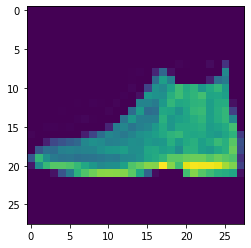

In [55]:
plt.imshow(test_image.reshape((28,28)))


In [58]:
predicted = model.predict(test_image.reshape((1,28,28,1)))
predicted

array([[1.1457909e-10, 1.3407461e-10, 4.9687804e-10, 5.5757554e-10,
        2.0077523e-10, 8.9780258e-07, 5.7743499e-10, 3.4813611e-06,
        2.6037472e-09, 9.9999559e-01]], dtype=float32)

In [59]:
predicted.argmax()


9